In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

Problem 1 - Data Read, Write and Inspect:
Complete all following Task:
• Dataset for the Task: "bank.csv"
1. Load the provided dataset and import in pandas DataFrame.

In [6]:
data=pd.read_csv("/content/drive/MyDrive/bank.csv")
print(data)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

In [7]:
df=pd.DataFrame(data)
print(df)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

2. Check info of the DataFrame and identify following:
(a) columns with dtypes=object


In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

(b) unique values of those columns.

In [9]:
df.nunique()

,0
age,77
job,12
marital,3
education,4
default,2
balance,7168
housing,2
loan,2
contact,3
day,31


(c) check for the total number of null values in each column.

In [10]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in ”.csv” with name ”banknumericdata.csv”

In [11]:
new_data=df.select_dtypes(exclude=['object'])
new_data.to_csv("banknumericdata.csv",index=False)
print(new_data)

       age  balance  day  duration  campaign  pdays  previous
0       58     2143    5       261         1     -1         0
1       44       29    5       151         1     -1         0
2       33        2    5        76         1     -1         0
3       47     1506    5        92         1     -1         0
4       33        1    5       198         1     -1         0
...    ...      ...  ...       ...       ...    ...       ...
45206   51      825   17       977         3     -1         0
45207   71     1729   17       456         2     -1         0
45208   72     5715   17      1127         5    184         3
45209   57      668   17       508         4     -1         0
45210   37     2971   17       361         2    188        11

[45211 rows x 7 columns]


4. Read ”banknumericdata.csv” and Find the summary statistics.

In [12]:
numeric_df=pd.read_csv("/content/banknumericdata.csv")
print(numeric_df)

       age  balance  day  duration  campaign  pdays  previous
0       58     2143    5       261         1     -1         0
1       44       29    5       151         1     -1         0
2       33        2    5        76         1     -1         0
3       47     1506    5        92         1     -1         0
4       33        1    5       198         1     -1         0
...    ...      ...  ...       ...       ...    ...       ...
45206   51      825   17       977         3     -1         0
45207   71     1729   17       456         2     -1         0
45208   72     5715   17      1127         5    184         3
45209   57      668   17       508         4     -1         0
45210   37     2971   17       361         2    188        11

[45211 rows x 7 columns]


In [13]:
summary=numeric_df.describe()
print(summary)

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

Problem 2 - Data Imputations:
Complete all the following Task:
• Dataset for the Task: "medical_student.csv"
1. Load the provided dataset and import in pandas DataFrame.


In [14]:
medical_data=pd.read_csv("/content/drive/MyDrive/medical_students_dataset.csv",sep=",", engine='python', skipinitialspace=True)
print(medical_data.head())

   Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1         2.0   NaN    Male  152.069157  47.630941          B        NaN   
2         3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3         NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.0  Female         NaN  46.234173          O        NaN   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0          NaN        95.0           109.0        203.0       No     NaN  
1    98.714977        93.0           104.0        163.0       No      No  
2    98.260293        76.0           130.0        216.0      Yes      No  
3    98.839605        99.0           112.0        141.0       No     Yes  
4    98.480008        95.0             NaN        231.0       No      No  


2. Check info of the DataFrame and identify column with missing (null) values.

In [15]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [16]:
missing_value=medical_data.isnull().sum()
print(missing_value)

Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64


3. For the column with missing values fill the values using various techniques we discussed above. Try to explain why did you select the particular methods for particular column.

In [17]:
medical_data['Student ID'] = medical_data['Student ID'].ffill()

Reason: Age is numeric and roughly normally distributed; mean and median preserves data distribution.

In [18]:
medical_data['Age'] = medical_data['Age'].fillna(medical_data['Age'].median())

Reason: Gender has few categories, using mode avoids bias.

In [19]:
missing_value_after = medical_data.isnull().sum()
print(missing_value_after)


Student ID            0
Age                   0
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64


4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items. {Hint: dataset.duplicated.sum()}

In [20]:
medical_data.duplicated().sum()

np.int64(7712)

In [21]:
medical_data = medical_data.drop_duplicates()

In [22]:
medical_data.duplicated().sum()

np.int64(0)

3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”: Dataset Used: "titanic.csv"
Problem - 1:
Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’. Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean, median, maximum value, and minimum value of the ’Fare’ column?


In [23]:
Df=pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv")
print(Df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [24]:
subset = Df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
subset

,Name,Pclass,Sex,Age,Fare,Survived
0,"Braund, Mr. Owen Harris",3,male,22.0,7.2500,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
2,"Heikkinen, Miss. Laina",3,female,26.0,7.9250,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
4,"Allen, Mr. William Henry",3,male,35.0,8.0500,0
...,...,...,...,...,...,...
886,"Montvila, Rev. Juozas",2,male,27.0,13.0000,0
887,"Graham, Miss. Margaret Edith",1,female,19.0,30.0000,1
888,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,23.4500,0
889,"Behr, Mr. Karl Howell",1,male,26.0,30.0000,1


In [25]:
first_class = subset[subset['Pclass'] == 1]

In [26]:
mean_fare = first_class['Fare'].mean()
median_fare = first_class['Fare'].median()
max_fare = first_class['Fare'].max()
min_fare = first_class['Fare'].min()

print("Mean Fare:", mean_fare)
print("Median Fare:", median_fare)
print("Max Fare:", max_fare)
print("Min Fare:", min_fare)


Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Max Fare: 512.3292
Min Fare: 0.0


In [27]:
Df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Problem - 2:
How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found this out, drop them from your DataFrame.


In [28]:
missing_age=subset['Age'].isnull().sum()
print("Total missing age: ",missing_age)

Total missing age:  177


In [29]:
subset=subset.dropna(subset=['Age'])
print(subset)

                                                  Name  Pclass     Sex   Age  \
0                              Braund, Mr. Owen Harris       3    male  22.0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
2                               Heikkinen, Miss. Laina       3  female  26.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
4                             Allen, Mr. William Henry       3    male  35.0   
..                                                 ...     ...     ...   ...   
885               Rice, Mrs. William (Margaret Norton)       3  female  39.0   
886                              Montvila, Rev. Juozas       2    male  27.0   
887                       Graham, Miss. Margaret Edith       1  female  19.0   
889                              Behr, Mr. Karl Howell       1    male  26.0   
890                                Dooley, Mr. Patrick       3    male  32.0   

        Fare  Survived  
0     7.2500  

In [30]:
print(subset['Age'].isnull().sum())

0


Problem - 3:
The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka tion:
• ’C’ for Cherbourg
• ’Q’ for Queenstown
• ’S’ for Southampton
Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’, ’Embarked Q’, ’Embarked S’).


In [31]:
print(Df['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [32]:
embarked_dummies = pd.get_dummies(Df['Embarked'], prefix='Embarked')

df = pd.concat([Df, embarked_dummies], axis=1)
print(df[['Embarked_C', 'Embarked_Q', 'Embarked_S']].head())

   Embarked_C  Embarked_Q  Embarked_S
0       False       False        True
1        True       False       False
2       False       False        True
3       False       False        True
4       False       False        True


2. Add these new columns to the original DataFrame.

In [33]:
df = pd.concat([df, embarked_dummies], axis=1)
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


3. Drop the original ’Embarked’ column.

In [34]:
df = df.drop('Embarked', axis=1)

4. Print the first few rows of the modified DataFrame to verify the changes.

In [35]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  \
0      0         A/5 21171   7.2500   NaN       False       False        True   
1      0          PC 17599  71.2833   C85        True       False       False   
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True

Problem - 4:
Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual ization to show how the survival distributions vary by gender.


In [36]:
mean_survival = df.groupby('Sex')['Survived'].mean()
print(mean_survival)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


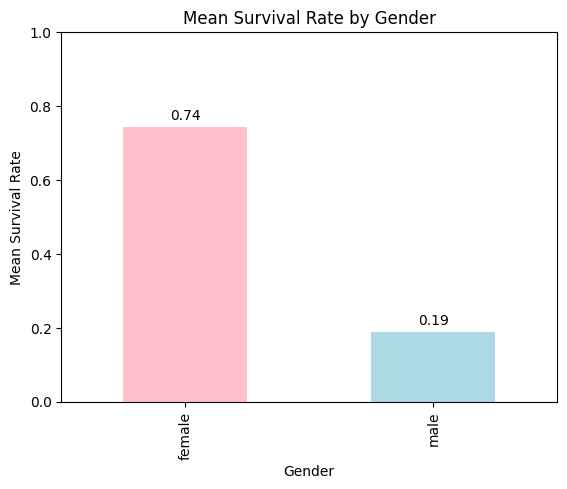

In [37]:
mean_survival.plot(kind='bar', color=['pink', 'lightblue'])


plt.title('Mean Survival Rate by Gender')
plt.ylabel('Mean Survival Rate')
plt.xlabel('Gender')
plt.ylim(0, 1)


for i, v in enumerate(mean_survival):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')

plt.show()

Problem - 5:
Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).


In [38]:
df = pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv")

In [39]:
survival_by_port_gender = df.groupby(['Embarked', 'Sex'])['Survived'].mean().unstack()
print(survival_by_port_gender)


Sex         female      male
Embarked                    
C         0.876712  0.305263
Q         0.750000  0.073171
S         0.689655  0.174603


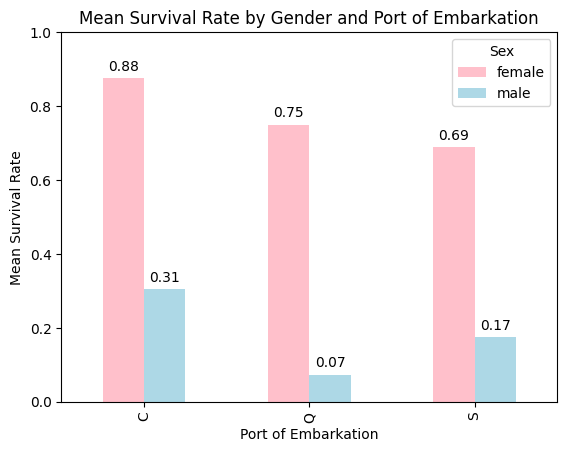

In [40]:
survival_by_port_gender.plot(kind='bar', color=['pink', 'lightblue'])

plt.title('Mean Survival Rate by Gender and Port of Embarkation')
plt.ylabel('Mean Survival Rate')
plt.xlabel('Port of Embarkation')
plt.ylim(0, 1)

for i, port in enumerate(survival_by_port_gender.index):
    for j, sex in enumerate(survival_by_port_gender.columns):
        value = survival_by_port_gender.loc[port, sex]
        plt.text(i + j*0.25 - 0.125, value + 0.02, f"{value:.2f}", ha='center')

plt.legend(title='Sex')
plt.show()

Problem - 6{Optional}:
Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the ’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class and age group. Draw a visualization using a any plotting library to represent this graphically.


In [41]:
df = df.dropna(subset=['Age', 'Pclass'])

In [42]:
df['AgeGroup'] = pd.qcut(df['Age'], 5)
print(df[['Age', 'AgeGroup']].head())

    Age      AgeGroup
0  22.0  (19.0, 25.0]
1  38.0  (31.8, 41.0]
2  26.0  (25.0, 31.8]
3  35.0  (31.8, 41.0]
4  35.0  (31.8, 41.0]


In [43]:
survival_by_age_pclass = df.groupby(['AgeGroup', 'Pclass'])['Survived'].mean().unstack()
print(survival_by_age_pclass)

Pclass                1         2         3
AgeGroup                                   
(0.419, 19.0]  0.809524  0.742857  0.333333
(19.0, 25.0]   0.761905  0.400000  0.197674
(25.0, 31.8]   0.666667  0.416667  0.283582
(31.8, 41.0]   0.777778  0.461538  0.166667
(41.0, 80.0]   0.506667  0.363636  0.088235


/tmp/ipython-input-1813557859.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_pclass = df.groupby(['AgeGroup', 'Pclass'])['Survived'].mean().unstack()


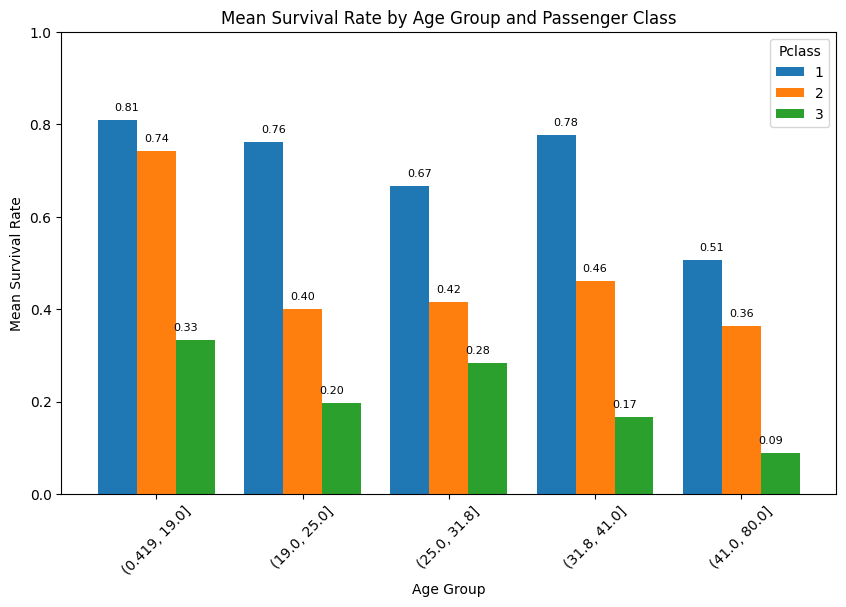

In [44]:
survival_by_age_pclass.plot(kind='bar', figsize=(10,6), width=0.8)

plt.title('Mean Survival Rate by Age Group and Passenger Class')
plt.xlabel('Age Group')
plt.ylabel('Mean Survival Rate')
plt.ylim(0, 1)
plt.xticks(rotation=45)
for i, age_group in enumerate(survival_by_age_pclass.index):
    for j, pclass in enumerate(survival_by_age_pclass.columns):
        value = survival_by_age_pclass.loc[age_group, pclass]
        plt.text(i + j*0.2 - 0.2, value + 0.02, f"{value:.2f}", ha='center', fontsize=8)

plt.legend(title='Pclass')
plt.show()